In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics

In [87]:
df=pd.read_csv("C:/Users/Thavasi M/Downloads/archive (2).zip")
print(df)



            Date        Open        High         Low       Close
0     2010-01-04    7.622500    7.660714    7.585000    7.643214
1     2010-01-05    7.664286    7.699643    7.616071    7.656429
2     2010-01-06    7.656429    7.686786    7.526786    7.534643
3     2010-01-07    7.562500    7.571429    7.466071    7.520714
4     2010-01-08    7.510714    7.571429    7.466429    7.570714
...          ...         ...         ...         ...         ...
2890  2021-06-28  133.410004  135.250000  133.350006  134.779999
2891  2021-06-29  134.800003  136.490005  134.350006  136.330002
2892  2021-06-30  136.169998  137.410004  135.869995  136.960007
2893  2021-07-01  136.600006  137.330002  135.759995  137.270004
2894  2021-07-02  137.899994  140.000000  137.750000  139.960007

[2895 rows x 5 columns]


In [88]:
df.head()


,Date,Open,High,Low,Close
0,2010-01-04,7.622500,7.660714,7.585000,7.643214
1,2010-01-05,7.664286,7.699643,7.616071,7.656429
2,2010-01-06,7.656429,7.686786,7.526786,7.534643
3,2010-01-07,7.562500,7.571429,7.466071,7.520714
4,2010-01-08,7.510714,7.571429,7.466429,7.570714


In [89]:
df.tail()


,Date,Open,High,Low,Close
2890,2021-06-28,133.410004,135.250000,133.350006,134.779999
2891,2021-06-29,134.800003,136.490005,134.350006,136.330002
2892,2021-06-30,136.169998,137.410004,135.869995,136.960007
2893,2021-07-01,136.600006,137.330002,135.759995,137.270004
2894,2021-07-02,137.899994,140.000000,137.750000,139.960007


In [90]:
df.shape

(2895, 5)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2895 entries, 0 to 2894
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2895 non-null   object 
 1   Open    2895 non-null   float64
 2   High    2895 non-null   float64
 3   Low     2895 non-null   float64
 4   Close   2895 non-null   float64
dtypes: float64(4), object(1)
memory usage: 113.2+ KB


In [92]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [93]:
df.describe()

,Open,High,Low,Close
count,2895.000000,2895.000000,2895.000000,2895.000000
mean,37.916409,38.308367,37.516815,37.927430
std,30.940397,31.317698,30.537223,30.943089
min,6.870357,7.000000,6.794643,6.858929
25%,18.005178,18.136608,17.839822,17.951428
50%,27.592501,27.937500,27.299999,27.594999
75%,44.887499,45.151249,44.465000,44.795001
max,143.600006,145.089996,141.369995,143.160004


<Axes: >

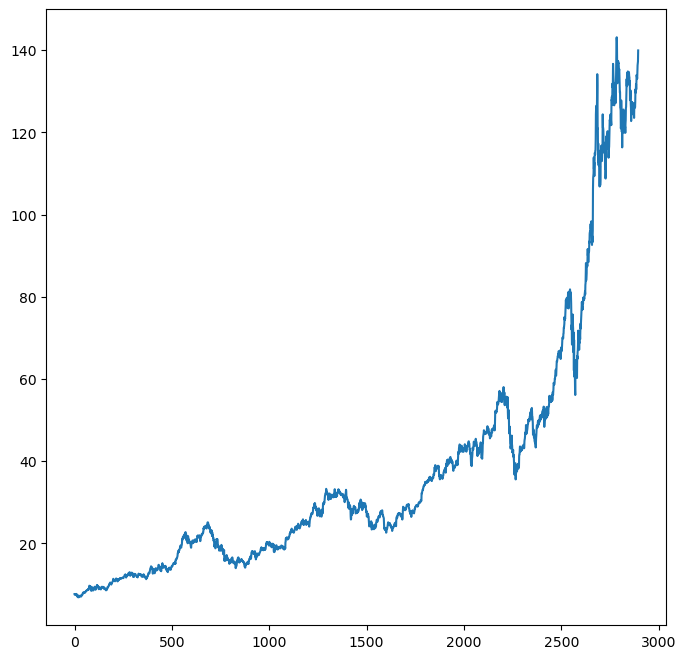

In [94]:
df['Close'].plot(figsize=(8,8))


In [95]:
x=df[['Open','High','Low']]
y=df['Close']

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [97]:
print(x_train.shape,x_test.shape)

(2171, 3) (724, 3)


In [98]:
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [99]:
print(regressor.coef_)
print(regressor.intercept_)

[-0.59489155  0.84086008  0.75369761]
-0.0056353593368285715


In [100]:
predicted=regressor.predict(x_test)
print(x_test)
print(predicted)

            Open        High         Low
2308   43.467499   43.610001   43.005001
2136   46.025002   46.552502   45.950001
22      7.026071    7.084643    6.841786
1005   19.791786   20.045713   19.785713
248    11.639643   11.666429   11.609286
...          ...         ...         ...
2044   42.447498   43.272499   42.250000
232    11.321786   11.380357   11.297857
610    20.045357   20.231071   19.940357
2175   53.662498   54.262501   53.650002
2844  133.039993  134.149994  131.410004

[724 rows x 3 columns]
[ 43.2185924   46.39102658   6.92844564  19.98848292  11.62976497
  19.30485126  66.68123705  56.68124551  16.48632854  32.56411566
  14.16362172  44.60208797  14.12996667 129.78806653  16.14765105
  19.22754807  19.87719391  47.24550548  12.46268106  47.75663275
  20.35992714  27.75929327  16.55834931  21.14569144  11.81091748
  11.97546251  47.5479568   33.02350077   9.62011091  12.13430924
 107.51267645  52.24290135 133.89345812   9.80777083  42.16773732
  43.42635368 128.4504

In [101]:
predicted.shape

(724,)

In [102]:
df=pd.DataFrame({"actual":y_test,"predicted":predicted})
print(df)

          actual   predicted
2308   43.125000   43.218592
2136   46.375000   46.391027
22      6.858929    6.928446
1005   20.036428   19.988483
248    11.623929   11.629765
...          ...         ...
2044   43.247501   42.972548
232    11.337143   11.343586
610    20.101070   20.110051
2175   53.872501   54.134048
2844  131.940002  132.694778

[724 rows x 2 columns]


In [103]:
regressor.score(x_test,y_test)

0.9998615691474141

In [104]:
import math
print("Mean Absolute Error",metrics.mean_absolute_error(y_test,predicted))
print("Mean Square Error",metrics.mean_squared_error(y_test,predicted)) 
print("Root Mean Error",metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error 0.16643040096013204
Mean Square Error 0.1273214091950436
Root Mean Error 0.16643040096013204


In [105]:
predicted=regressor.predict(x)
print(predicted)

[  7.6181888    7.64948264   7.57605187 ... 136.93546159 136.52947624
 139.50108112]


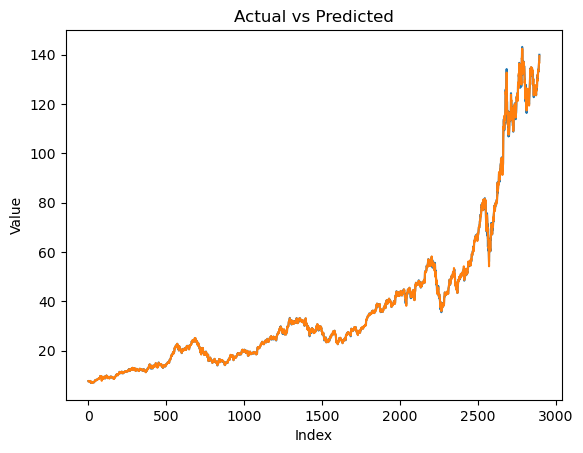

In [106]:
plt.title("Actual vs Predicted")
plt.plot(y,label="Actual")
plt.plot(predicted,label="Predicted")
plt.xlabel("Index")
plt.ylabel("Value")
plt.show()